In [555]:
import networkx as nx
import pylab as plt
import os
from sklearn.metrics import pairwise_distances

In [556]:
G = nx.erdos_renyi_graph(2, 0)
er_num = 50
er_prob = 0.1
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(er_num, er_prob)

In [557]:
D = dict(nx.all_pairs_shortest_path_length(G))
D = [[D[i][j] for j in range(len(D[i]))] for i in range(len(D))]
D

[[0,
  3,
  3,
  2,
  3,
  2,
  2,
  3,
  3,
  2,
  3,
  3,
  3,
  3,
  2,
  3,
  2,
  1,
  1,
  3,
  3,
  3,
  3,
  3,
  2,
  1,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  3,
  3,
  2,
  2,
  1,
  3,
  2,
  2,
  3,
  3,
  3,
  3,
  3],
 [3,
  0,
  1,
  3,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  4,
  2,
  2,
  3,
  3,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  2,
  3,
  2,
  3,
  3,
  2,
  2,
  3,
  2,
  3,
  1,
  3,
  1,
  2,
  3,
  2,
  1,
  2,
  2,
  3,
  3,
  1,
  1,
  3,
  4,
  2,
  2],
 [3,
  1,
  0,
  3,
  3,
  1,
  3,
  2,
  3,
  1,
  3,
  3,
  2,
  3,
  2,
  3,
  3,
  2,
  3,
  3,
  4,
  3,
  2,
  3,
  3,
  2,
  2,
  2,
  2,
  1,
  3,
  2,
  3,
  1,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  3,
  4,
  3,
  2],
 [2,
  3,
  3,
  0,
  2,
  2,
  3,
  3,
  1,
  3,
  1,
  3,
  2,
  1,
  1,
  3,
  1,
  3,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  1,
  2,
  4,
  3,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  2,
  2,
  2,
  2,
  3,
  3,
  1,
  

In [558]:
pos_spr = nx.spring_layout(G)
# nx.draw(G, pos_spr)

In [559]:
pos_r = nx.random_layout(G)
# nx.draw(G, pos_r)

In [560]:
pos_spi = nx.spiral_layout(G)
# nx.draw(G, pos_spi)

In [561]:
X_spr = pairwise_distances([pos_spr[i] for i in range(len(pos_spr))])
X_r = pairwise_distances([pos_r[i] for i in range(len(pos_r))])
X_spi = pairwise_distances([pos_spi[i] for i in range(len(pos_spi))])

In [562]:
def min_alpha(X, D):
    num = 0
    den = 0
    for i in range(len(D)):
        for j in range(i+1, len(D)):
            num += X[i][j] / D[i][j]
            den += (X[i][j] ** 2) / (D[i][j] ** 2)
    return num / den

In [563]:
def intersect_alpha(X1, X2, D):
    num = 0
    den = 0
    for i in range(len(D)):
        for j in range(i+1, len(D)):
            num += (X1[i][j] - X2[i][j]) / D[i][j]
            den += (X1[i][j] ** 2 - X2[i][j] ** 2) / (D[i][j] ** 2)
    num *= 2
    return num / den

In [564]:
def stress(X, D, alpha):
    S = 0
    for i in range(len(D)):
        for j in range(i+1, len(D)):
            S += ((alpha * X[i][j] - D[i][j]) ** 2) / (D[i][j] ** 2)
    return S

In [565]:
min_alpha_spr = min_alpha(X_spr, D)
min_alpha_r = min_alpha(X_r, D)
min_alpha_spi = min_alpha(X_spi, D)
print(min_alpha_spr)
print(min_alpha_r)
print(min_alpha_spi)

2.772418572524073
2.956782100476768
1.8917302085964118


In [566]:
spr_r_alpha = intersect_alpha(X_spr, X_r, D)
spr_spi_alpha = intersect_alpha(X_spr, X_spi, D)
spi_r_alpha = intersect_alpha(X_spi, X_r, D)
print(spr_r_alpha)
print(spr_spi_alpha)
print(spi_r_alpha)

4.4818058450414275
1.2565143326411579
2.126667089430655


In [567]:
for alpha in [min_alpha_spr - 0.05, min_alpha_spr, min_alpha_spr + 0.05]:
    S = 0
    for i in range(len(D)):
        for j in range(i+1, len(D)):
            S += ((alpha * X_spr[i][j] - D[i][j]) ** 2) / (D[i][j] ** 2)
    print("alpha", alpha, S, sep='\t')

alpha	2.7224185725240733	185.63225855988063
alpha	2.772418572524073	185.29409023818425
alpha	2.822418572524073	185.63225855988065


In [568]:
for alpha in [spr_r_alpha - 0.05, spr_r_alpha, spr_r_alpha + 0.05]:
    S_spr = stress(X_spr, D, alpha)
    S_r = stress(X_r, D, alpha)
    print("alpha", alpha, "spr_str", S_spr, "r_str", S_r, sep='\t')

alpha	4.431805845041428	spr_str	557.7616236564227	r_str	565.4809414951682
alpha	4.4818058450414275	spr_str	580.5458803377818	r_str	580.5458803377826
alpha	4.531805845041427	spr_str	604.0064736625332	r_str	596.1129758594923


In [569]:
alphas = list()
S_spr = list()
S_r = list()
S_spi = list()
max_alpha = max(spr_r_alpha, spr_spi_alpha, spi_r_alpha, min_alpha_spr, min_alpha_r, min_alpha_spi) + 0.5
alpha = 0
while alpha < max_alpha:
    S_spr.append(stress(X_spr, D, alpha))
    S_r.append(stress(X_r, D, alpha))
    S_spi.append(stress(X_spi, D, alpha))
    alphas.append(alpha)
    alpha += max_alpha / 200

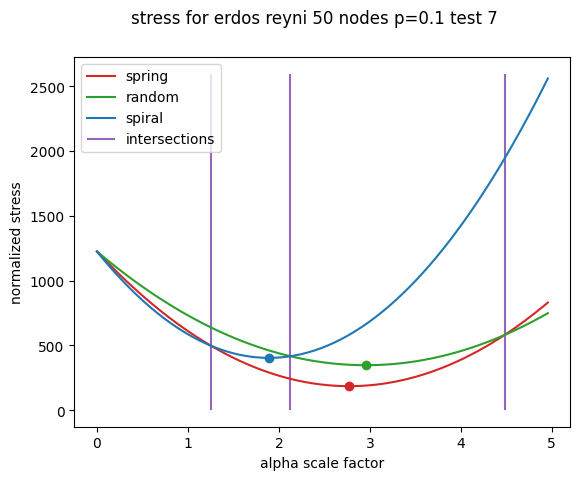

In [570]:
plt.plot(alphas, S_spr, label='spring', c='tab:red', zorder=0)
plt.plot(alphas, S_r, label='random', c='tab:green', zorder=0)
plt.plot(alphas, S_spi, label='spiral', c='tab:blue', zorder=0)
plt.scatter(min_alpha_spr, stress(
    X_spr, D, min_alpha_spr), c='tab:red', zorder=1)
plt.scatter(min_alpha_r, stress(X_r, D, min_alpha_r), c='tab:green', zorder=1)
plt.scatter(min_alpha_spi, stress(
    X_spi, D, min_alpha_spi), c='tab:blue', zorder=1)
plt.vlines([a for a in [spr_r_alpha, spr_spi_alpha, spi_r_alpha] if a > 0],
           min(min_alpha_spr, min_alpha_r, min_alpha_spi),
           max(stress(X_spr, D, max_alpha), stress(
               X_r, D, max_alpha), stress(X_spi, D, max_alpha)),
           colors='tab:purple', zorder=-1, label='intersections')
plt.xlabel("alpha scale factor")
plt.ylabel("normalized stress")
plt.legend()
i = 0
while os.path.isfile(f"outputs/stress_comparison_small/er_{er_num}_{str(er_prob).replace('.', '')}_{i}.png"):
    i += 1
plt.suptitle(f"stress for erdos reyni {er_num} nodes p={er_prob} test {i}")
# plt.savefig(f"outputs/stress_comparison_small/er_{er_num}_{str(er_prob).replace('.', '')}_{i}.png")
plt.draw()